# Comparing 2 results
The whole point of creating a separate CSV for the comparison instead of doing it automatically is so that the category  

In [ ]:
import pandas as pd
import os
DISEASE_1 = "SCHIZOPHRENIA"
DISEASE_2 = "BREAST_CANCER"
TITLE = f"{DISEASE_1}_AND_{DISEASE_2}"
options=["unidirectional_multilayer", "multilayer", "regular"]
option_select = 2

METHOD = options[option_select]
comp_df1 = pd.read_csv(f"../Methods/output/DGIDB_SCHIZOPHRENIA/{METHOD}_rwr_results.csv")
comp_df2 = pd.read_csv(f"../Methods/output/DGIDB_BREAST_CANCER/{METHOD}_rwr_results.csv")
OUTPUT_FOLDER = f"./Data/Unlinked/{METHOD}/"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)



In [11]:
merged_df = pd.merge(comp_df1, comp_df2, on="claim_name", suffixes=('_df1', '_df2'))
merged_df['score_ratio'] = merged_df['Score_df1'] / merged_df['Score_df2'].replace(0, float('nan'))
sorted_df = merged_df.sort_values(by='score_ratio', ascending=False)  # descending


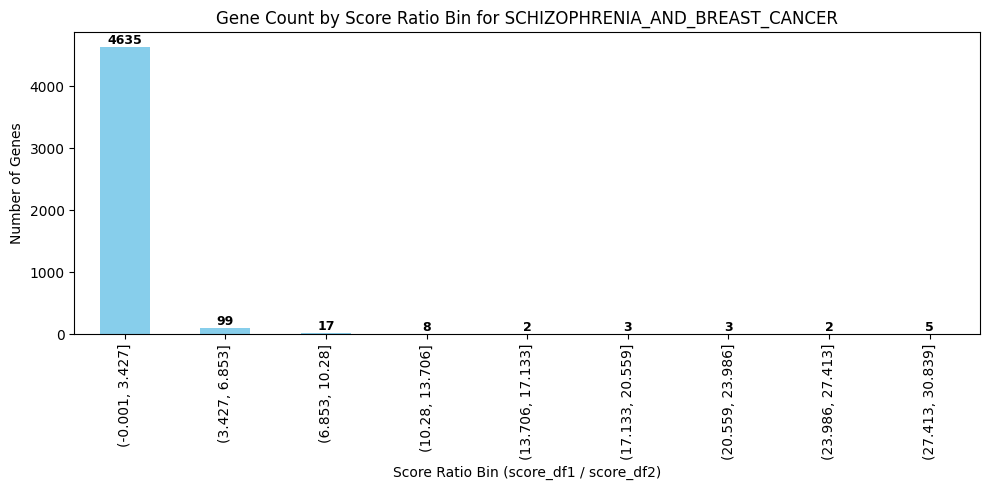

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Bin the score ratios
bins = np.linspace(0, merged_df['score_ratio'].max(), 10)
merged_df['score_ratio_bin'] = pd.cut(merged_df['score_ratio'], bins=bins, include_lowest=True)

# Count number of genes in each bin
bin_counts = merged_df['score_ratio_bin'].value_counts().sort_index()

# Plot
ax = bin_counts.plot(
    kind='bar',
    color='skyblue',
    figsize=(10, 5)
)

# Annotate each bar with the count
for idx, count in enumerate(bin_counts):
    ax.text(
        idx, count + 1, str(count),  # Slightly above the bar
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

plt.ylabel('Number of Genes')
plt.xlabel('Score Ratio Bin (score_df1 / score_df2)')
plt.title('Gene Count by Score Ratio Bin for ' + TITLE)
plt.tight_layout()
plt.show()


In [13]:
sorted_df.to_csv(OUTPUT_FOLDER + TITLE + ".tsv", sep="\t", index=False)

## After Manual Categorization

In [17]:
DISEASE_1 = "BIPOLAR"
DISEASE_2 = "FULL"
TITLE = f"{DISEASE_1}_AND_{DISEASE_2}"
options=["unidirectional_multilayer", "multilayer", "regular"]
option_select = 2
METHOD = options[option_select]

linked = pd.read_csv(f"./Data/Linked/{METHOD}_rwr/{TITLE}.tsv", sep='\t')

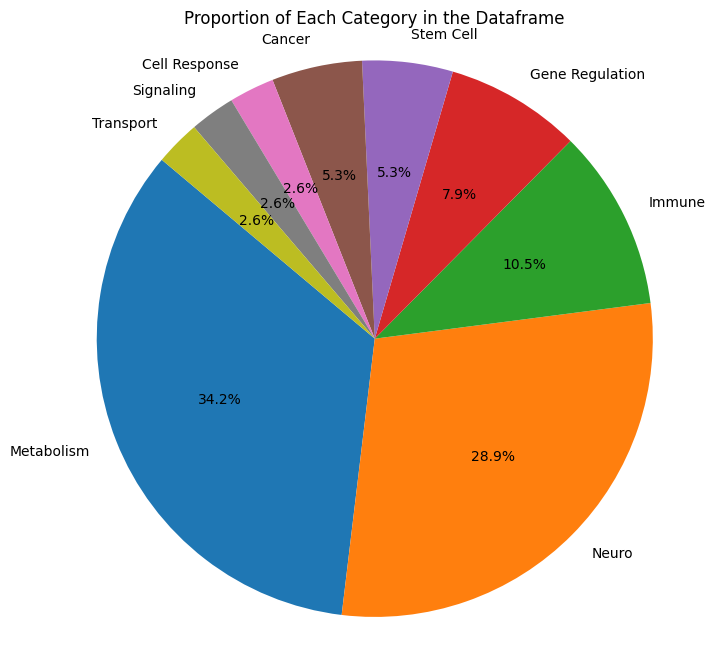

In [18]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each category
category_counts = linked['Category'].value_counts(dropna=True)  # include NaNs if any
category_percent = category_counts / category_counts.sum() * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_percent, labels=category_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Category in the Dataframe')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

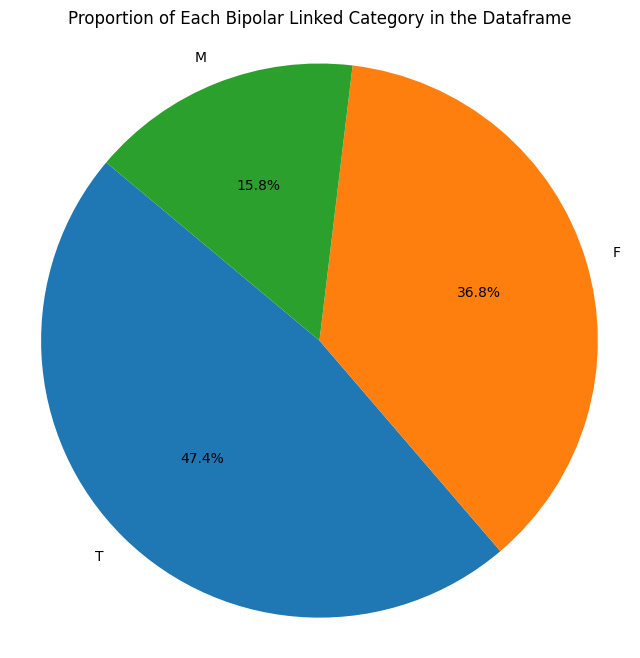

In [ ]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each category
category_counts = linked['Bipolar Linked?'].value_counts(dropna=True)  # include NaNs if any
category_percent = category_counts / category_counts.sum() * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_percent, labels=category_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Bipolar Linked Category in the Dataframe')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

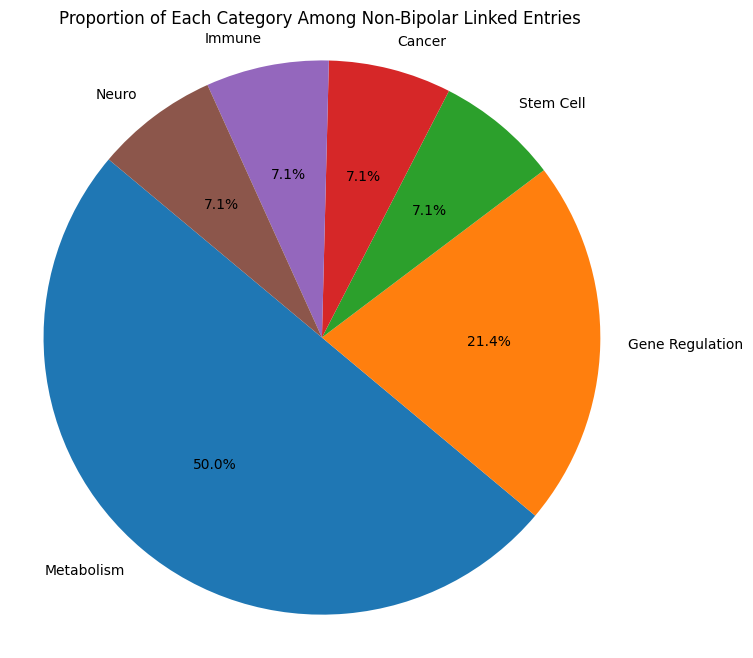

In [ ]:
import matplotlib.pyplot as plt

# Filter for only non-linked bipolar entries
non_linked = linked[linked['Bipolar Linked?'] == "F"]  # or use != True depending on data

# Count the number of occurrences for each category
category_counts = non_linked['Category'].value_counts(dropna=True)
category_percent = category_counts / category_counts.sum() * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_percent, labels=category_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Category Among Non-Bipolar Linked Entries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


      Unnamed: 0  index  score_df1 claim_name  ncbi_gene_id_df1  \
0              8    463   0.002483      HTR2C              3358   
1             17   2973   0.001744      EPM2A              7957   
2             19    935   0.001692     RABEP1              9135   
3             18    934   0.001692      SH2B1             25970   
4             13    393   0.001973      MTHFR              4524   
...          ...    ...        ...        ...               ...   
4346        1738    200   0.000168   HSD17B10              3028   
4347        1648     52   0.000168      KDM4A              9682   
4348        1529    109   0.000168        VDR              7421   
4349          86    162   0.000899         AR               367   
4350         329    184   0.000393     NFE2L2              4780   

      ncbi_gene_id_df2  score_df2  score_ratio    Category  \
0                 3358   0.000244    10.165259       Neuro   
1                 7957   0.000177     9.831490       Neuro   
2        

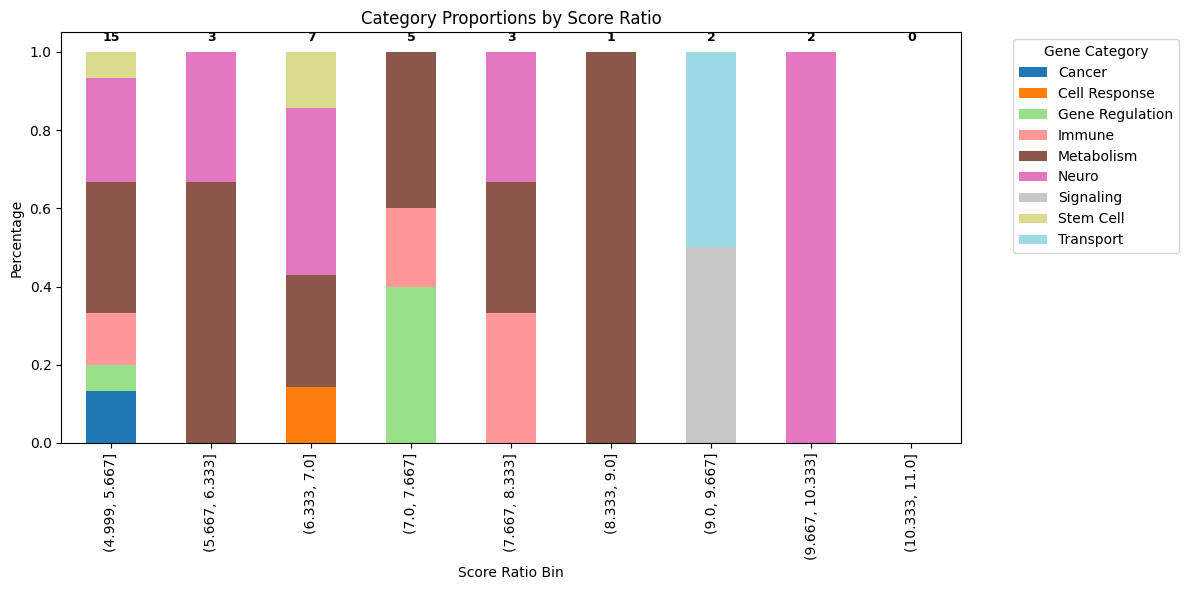

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Bin the score_ratio values
bins = np.linspace(5.0, 11.0, 10)  # Adjust this range based on your data
linked['score_ratio_bin'] = pd.cut(linked['score_ratio'], bins=bins, include_lowest=True)
print(linked)
# Count number of each category in each bin
binned = linked.groupby(['score_ratio_bin', 'Category']).size().unstack(fill_value=0)
print(binned)
# Get total counts for annotation
bin_totals = binned.sum(axis=1)

# Normalize to percentages for plotting
binned_percent = binned.div(bin_totals, axis=0)

# Plot
ax = binned_percent.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(12, 6)
)

# Annotate each bar with the total count
for idx, total in enumerate(bin_totals):
    ax.text(
        idx, 1.02, str(total),  # x-position, y-position (slightly above the bar), text
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

plt.ylabel('Percentage')
plt.xlabel('Score Ratio Bin')
plt.title('Category Proportions by Score Ratio')
plt.legend(title='Gene Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from IPython.display import display, clear_output

# ==== Disease Mapping ====
disease_options = {
    "Bipolar": "BIPOLAR",
    "Schizophrenia": "SCHIZOPHRENIA",
    "Breast Cancer": "BREAST_CANCER",
    "Full": "FULL"
}

# ==== Widgets ====
disease1_selector = widgets.Dropdown(
    options=disease_options,
    value="BIPOLAR",
    description='Disease 1:'
)

disease2_selector = widgets.Dropdown(
    options=disease_options,
    value="FULL",
    description='Disease 2:'
)

method_selector = widgets.Dropdown(
    options=["unidirectional_multilayer", "multilayer", "regular"],
    value="regular",
    description='Method:'
)

output = widgets.Output()

def plot_dashboard(disease1, disease2, method):
    title = f"{disease1}_AND_{disease2}"
    path = f"./Data/Linked/{method}_rwr/{title}.tsv"

    try:
        linked = pd.read_csv(path, sep='\t')

        # === Plot 1: Top 10 Genes by Score Ratio ===
        top10 = linked.sort_values(by='score_ratio', ascending=False).head(10)
        plt.figure(figsize=(10, 6))
        plt.bar(top10['claim_name'], top10['score_ratio'], color='skyblue')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Score Ratio')
        plt.title(f'Top 10 Genes by Score Ratio ({title})')
        plt.tight_layout()
        plt.show()

        # === Plot 2: Pie Chart of 'Category' ===
        category_counts = linked['Category'].value_counts(dropna=True)
        category_percent = category_counts / category_counts.sum() * 100
        plt.figure(figsize=(8, 8))
        plt.pie(category_percent, labels=category_percent.index, autopct='%1.1f%%', startangle=140)
        plt.title('Proportion of Each Category in the Dataframe')
        plt.axis('equal')
        plt.show()

        # === Plot 3: Pie Chart of 'Bipolar Linked?' ===
        bp_linked_counts = linked['Bipolar Linked?'].value_counts(dropna=True)
        bp_linked_percent = bp_linked_counts / bp_linked_counts.sum() * 100
        plt.figure(figsize=(8, 8))
        plt.pie(bp_linked_percent, labels=bp_linked_percent.index, autopct='%1.1f%%', startangle=140)
        plt.title('Proportion of Each Bipolar Linked Category in the Dataframe')
        plt.axis('equal')
        plt.show()

        # === Plot 4: Pie Chart of Non-Bipolar Linked Category ===
        non_linked = linked[linked['Bipolar Linked?'] == "F"]
        non_linked_counts = non_linked['Category'].value_counts(dropna=True)
        non_linked_percent = non_linked_counts / non_linked_counts.sum() * 100
        plt.figure(figsize=(8, 8))
        plt.pie(non_linked_percent, labels=non_linked_percent.index, autopct='%1.1f%%', startangle=140)
        plt.title('Proportion of Each Category Among Non-Bipolar Linked Entries')
        plt.axis('equal')
        plt.show()

        # === Plot 5: Stacked Bar Chart of Category Distribution by Score Ratio Bin ===
        bins = np.linspace(5.0, 11.0, 10)  # Adjust range as needed
        linked['score_ratio_bin'] = pd.cut(linked['score_ratio'], bins=bins, include_lowest=True)
        binned = linked.groupby(['score_ratio_bin', 'Category']).size().unstack(fill_value=0)
        bin_totals = binned.sum(axis=1)
        binned_percent = binned.div(bin_totals, axis=0)

        ax = binned_percent.plot(
            kind='bar',
            stacked=True,
            colormap='tab20',
            figsize=(12, 6)
        )

        for idx, total in enumerate(bin_totals):
            ax.text(idx, 1.02, str(total), ha='center', va='bottom', fontsize=9, fontweight='bold')

        plt.ylabel('Percentage')
        plt.xlabel('Score Ratio Bin')
        plt.title('Category Proportions by Score Ratio')
        plt.legend(title='Gene Category', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error: {e}\nCheck if the file exists: {path}")

def update_plot(change):
    with output:
        clear_output(wait=True)
        d1 = disease1_selector.value
        d2 = disease2_selector.value
        method = method_selector.value
        plot_dashboard(d1, d2, method)

# Display UI
display(widgets.VBox([
    widgets.HBox([disease1_selector, disease2_selector, method_selector]),
    output
]))

# Register observers
for widget in [disease1_selector, disease2_selector, method_selector]:
    widget.observe(update_plot, names='value')

# Initial render
update_plot(None)
